## Skipable: Our Read-In / Cleaning Functions

In [20]:
# ----Skip this Section ----
# code to import and clean the data on heights in the US
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


def import_and_clean_data(filepath):
    #ignore fliepath; it was just a red herring
    
    #store the rng state and set the seed (so each person gets the same population)
    old_state = np.random.get_state()
    np.random.seed(100)
    
    #total and female population
    us_population_size = 1000000 #Was 300000000, but some older laptops run out of memory
    female_pop = int(np.floor(us_population_size*.508))
    
    #fill in population via two gaussians
    us_pop_heights = np.zeros(us_population_size)
    us_pop_heights[0:female_pop] = np.random.normal(163,5,female_pop)
    female_heights = np.random.normal(180,7,us_population_size-female_pop)
    us_pop_heights[female_pop:us_population_size] = female_heights
    
    #restore the original RNG state (so each person gets a different sample)
    np.random.set_state(old_state)
    
    # extract a sample of 107 heights
    sample_heights = np.random.choice(us_pop_heights, 107)
    
    return sample_heights

## Start Here: Data Read-in and Summary

In [21]:
#------Run These Once-----
# Import and cleaning takes a while, so just run this cell once


# Edit the filepath variable to the place you saved US_data.csv (or move US_data to the folder holding this notebook)
filepath="US_data.csv"
height_data = import_and_clean_data(filepath)

Object Type: <class 'numpy.ndarray'>
Dimensions: (107,)
Example Values: [ 158.48888851  158.17069337  171.19024132  169.44684827  180.39989054
  167.89111685  179.11586371  168.01071589  166.4901297   185.81617258]


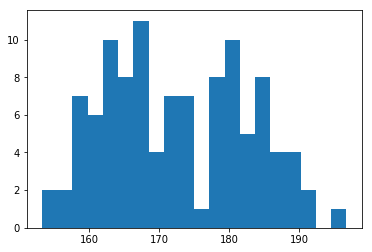

In [22]:
print("Object Type:", type(height_data))
print("Dimensions:", height_data.shape)
print("Example Values:", height_data[0:10])
plt.hist(height_data,20);

## Exercise 1: Vectorized Operations
We see above that the data is in a **numpy array**. We'll be using numpy a TON in this class, so we want to get you familiar with its layout.

First, numpy wants to perform operations on _entire vectors_ not individual elements. So instead of looping over each element, google for "numpy [name of thing you want to do]" and see if there's a built-in function. The built-ins will be much faster.

There are a lot of other "gotcha"s in numpy; we'll try to cover all of them in this lab.

**In the cell bleow**, calculate the mean, variance, and maximum value of the heights.

In [25]:
# ---- your code here ----
print("Your exact results will differ becuase you and I have different samples")

#calculate the mean
print("Mean:", np.mean(height_data))

#calculate the variance
print("Variance", np.var(height_data))

#calculate the maximum
print("Max", np.max(height_data))

Your exact results will differ becuase you and I have different samples
Mean: 172.627105859
Variance 101.292029452
Max 196.767907036


## Exercise 2: Bootstrapping
We've talked a lot about bootstrapping in lecture. Now it's time to implement.

We're going to write code for a non-parametric bootstrap, where we simply resample the data to build a new dataset, calculate the value of interest on that dataset, and repeat. We then use the distribution of the values-of-interest obtained as the sampling distribution of the value of interest.

**In the cell below**, implement a bootstrap procedure to find the sampling disttibution for the mean of the data. This will basically consist of np.random.choice() with replacement, a for loop, and your desired calculation(s).

Conduct 1000 bootstrap samples and plot a histogram of the sampling distribution.

1. If you are new to numpy, just find the sampling distribution of the mean. 
2. If you've used numpy before, also plot the sampling distribution of the variance and the max, using a preallocated 3 by 1000 array.
3. If you're a numpy expert, make a full-on do_bootstrap() function. Decide what inputs, features, and outputs are appropriate.

If you have extra time, climb the code-quality lader above. Your TF will be around to help

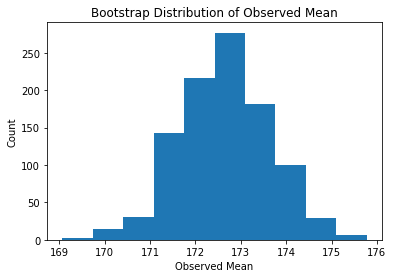

In [26]:
# ---- Basic code ----
n_bootstraps = 1000
sample_size = height_data.shape[0] #107

# using basic python
mean_list = []

#fill with values calculcated on lots of fake datasets
for i in range(n_bootstraps):
    fake_dataset = np.random.choice(height_data, sample_size, replace=True)
    
    mean_list.append(np.mean(fake_dataset))

#plot the distribution
plt.hist(mean_list)
plt.title("Bootstrap Distribution of Observed Mean")
plt.xlabel("Observed Mean")
plt.ylabel("Count")
plt.show()



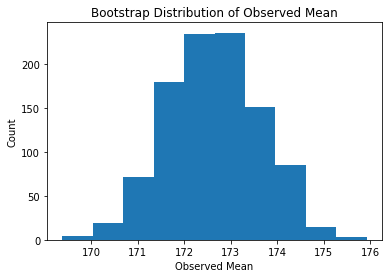

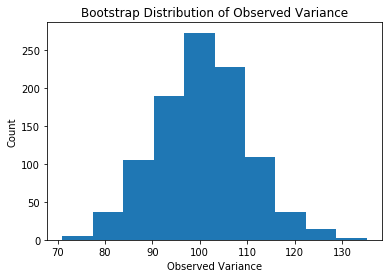

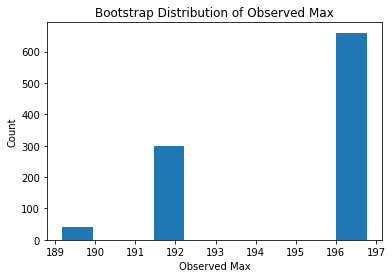

In [27]:
# ---- Advanced code ----
n_bootstraps = 1000
sample_size = height_data.shape[0] #107

#preallocate
bootstrap_estiamtes = np.zeros((3,n_bootstraps))

#fill with values calculcated on lots of fake datasets
for i in range(n_bootstraps):
    fake_dataset = np.random.choice(height_data, sample_size, replace=True)
    
    bootstrap_estiamtes[0,i]=np.mean(fake_dataset)
    bootstrap_estiamtes[1,i]=np.var(fake_dataset)
    bootstrap_estiamtes[2,i]=np.max(fake_dataset)
    
for i,word in zip(range(3),["Mean", "Variance", "Max"]):
    plt.hist(bootstrap_estiamtes[i,:])
    plt.title("Bootstrap Distribution of Observed {}".format(word))
    plt.xlabel("Observed {}".format(word))
    plt.ylabel("Count")
    plt.show()
    